# Prédiction du prix de Bitcoin – Projet d'analyse et modélisation


## 1️⃣ Importation des bibliothèques


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score



















## 2️⃣ Chargement et exploration du dataset


In [2]:
df=pd.read_excel('dataase.xlsx')


In [3]:
df.head()

,date,crude oil ( WTI),Heating Oil,Conventional Gasoline,RBOB,Ultra-Low Sulfur CARB Diesel,Kerosene-Type Jet Fuel,Propane,Natural GAZ,DJIA,NASDAQ,sp500,bitcoin,USD FUTURE INDEX,gold,Silver,copper
0,2015-01-02,52.72,1.554,1.378,1.586,1.537,1.539,0.546,2.889,"17,501.65","4,726.81","2,058.20","8,726.2",99.596,"1,184.80",15.829,2.9295
1,2015-01-05,50.05,1.646,1.462,1.667,1.518,1.647,0.547,2.894,"17,371.64","4,652.57","2,020.60","8,916.8",99.768,"1,188.15",15.636,2.9205
2,2015-01-06,47.98,1.709,1.540,1.750,1.516,1.709,0.574,2.855,"17,584.52","4,592.74","2,002.60","8,547.4",98.940,"1,184.20",16.394,2.9350
3,2015-01-07,48.69,1.774,1.575,1.663,1.599,1.653,0.594,2.777,"17,907.87","4,650.47","2,025.90","8,473.2",98.525,"1,193.50",16.591,2.9260
4,2015-01-08,48.80,1.718,1.483,1.659,1.674,1.675,0.604,2.816,"17,737.37","4,736.19","2,062.10","8,143.5",97.614,"1,215.73",16.702,2.9180


In [4]:
df.tail()

,date,crude oil ( WTI),Heating Oil,Conventional Gasoline,RBOB,Ultra-Low Sulfur CARB Diesel,Kerosene-Type Jet Fuel,Propane,Natural GAZ,DJIA,NASDAQ,sp500,bitcoin,USD FUTURE INDEX,gold,Silver,copper
2564,2024-12-24,70.87,2.011,1.901,2.301,2.208,1.909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,2024-12-26,70.38,1.929,1.873,2.286,2.205,1.886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,2024-12-27,71.28,1.906,1.874,2.287,2.138,1.887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,2024-12-30,71.73,1.907,1.850,2.321,2.022,1.866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2568,2024-12-31,72.44,1.886,1.868,NaN,1.974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Vérifier les colonnes
print(df.columns)

# Vérifier le type
print(df.dtypes)


Index(['date', 'crude oil ( WTI)', 'Heating Oil ', 'Conventional Gasoline',
       ' RBOB', 'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel',
       'Propane ', 'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'bitcoin',
       'USD FUTURE INDEX', 'gold', 'Silver', ' copper'],
      dtype='object')
date                            datetime64[ns]
crude oil ( WTI)                       float64
Heating Oil                            float64
Conventional Gasoline                  float64
 RBOB                                  float64
Ultra-Low Sulfur CARB Diesel           float64
Kerosene-Type Jet Fuel                 float64
Propane                                float64
Natural GAZ                            float64
DJIA                                    object
NASDAQ                                  object
sp500                                   object
bitcoin                                 object
USD FUTURE INDEX                       float64
gold                                    o

In [6]:
cols_to_clean = ['crude oil ( WTI)', 'Heating Oil ', 'Conventional Gasoline',
       ' RBOB', 'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel',
       'Propane ', 'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'bitcoin',
       'USD FUTURE INDEX', 'gold', 'Silver', ' copper']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False).astype(float)


In [7]:
print(df.dtypes)

date                            datetime64[ns]
crude oil ( WTI)                       float64
Heating Oil                            float64
Conventional Gasoline                  float64
 RBOB                                  float64
Ultra-Low Sulfur CARB Diesel           float64
Kerosene-Type Jet Fuel                 float64
Propane                                float64
Natural GAZ                            float64
DJIA                                   float64
NASDAQ                                 float64
sp500                                  float64
bitcoin                                float64
USD FUTURE INDEX                       float64
gold                                   float64
Silver                                 float64
 copper                                float64
dtype: object


In [8]:
df.isnull().sum()

date                             0
crude oil ( WTI)                64
Heating Oil                      0
Conventional Gasoline            0
 RBOB                            1
Ultra-Low Sulfur CARB Diesel     5
Kerosene-Type Jet Fuel           1
Propane                          7
Natural GAZ                     53
DJIA                            53
NASDAQ                          53
sp500                           53
bitcoin                         53
USD FUTURE INDEX                53
gold                            53
Silver                          53
 copper                         53
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## 3️⃣ Prétraitement des données


In [10]:
numeric_cols=[['date', 'crude oil ( WTI)', 'Heating Oil ', 'Conventional Gasoline',
       ' RBOB', 'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel',
       'Propane ', 'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'bitcoin',
       'USD FUTURE INDEX', 'gold', 'Silver', ' copper']]
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


In [11]:
df.isnull().sum()

date                            0
crude oil ( WTI)                0
Heating Oil                     0
Conventional Gasoline           0
 RBOB                           0
Ultra-Low Sulfur CARB Diesel    0
Kerosene-Type Jet Fuel          0
Propane                         0
Natural GAZ                     0
DJIA                            0
NASDAQ                          0
sp500                           0
bitcoin                         0
USD FUTURE INDEX                0
gold                            0
Silver                          0
 copper                         0
dtype: int64

In [12]:
df = df.dropna()

df.isnull().sum()   


date                            0
crude oil ( WTI)                0
Heating Oil                     0
Conventional Gasoline           0
 RBOB                           0
Ultra-Low Sulfur CARB Diesel    0
Kerosene-Type Jet Fuel          0
Propane                         0
Natural GAZ                     0
DJIA                            0
NASDAQ                          0
sp500                           0
bitcoin                         0
USD FUTURE INDEX                0
gold                            0
Silver                          0
 copper                         0
dtype: int64

In [13]:
df.shape

(2569, 17)

In [14]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year.astype(int)
df["month"] = df["date"].dt.month.astype(int)
df["day_of_week"] = df["date"].dt.dayofweek.astype(int)



In [15]:
df.columns = df.columns.str.strip()

In [16]:
df.columns.unique()

Index(['date', 'crude oil ( WTI)', 'Heating Oil', 'Conventional Gasoline',
       'RBOB', 'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel',
       'Propane', 'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'bitcoin',
       'USD FUTURE INDEX', 'gold', 'Silver', 'copper', 'year', 'month',
       'day_of_week'],
      dtype='object')

## 4️⃣ Visualisation des données


C:\Users\Admin\AppData\Local\Temp\ipykernel_10728\3926303935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year", y="bitcoin", data=variation_year, palette="Blues_d")


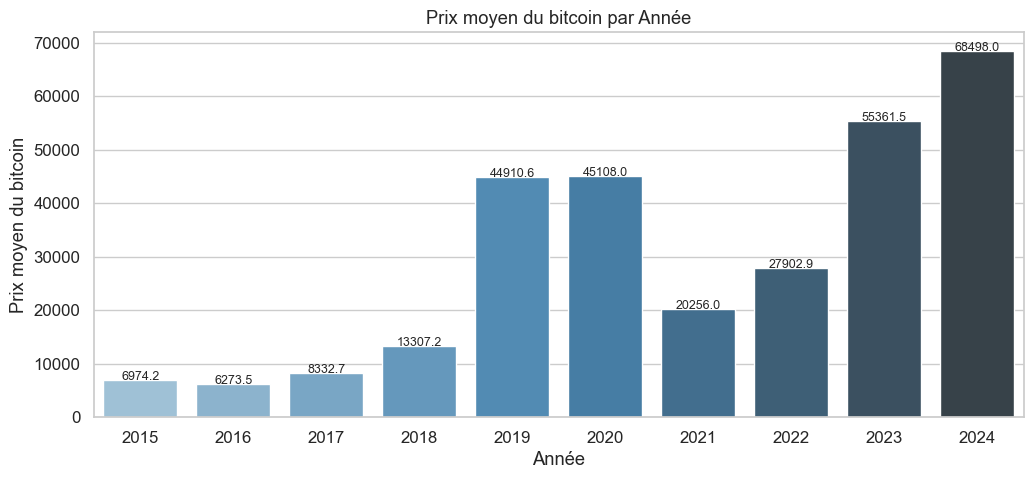

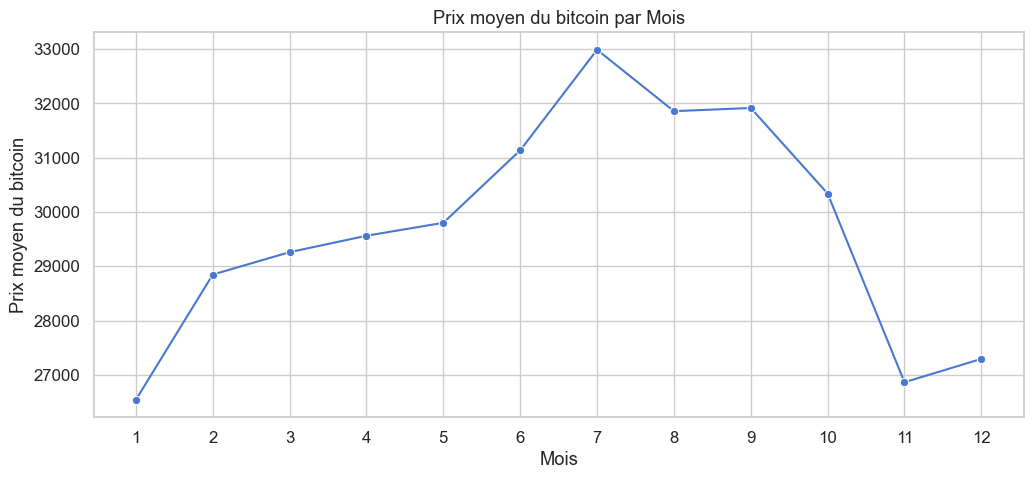

C:\Users\Admin\AppData\Local\Temp\ipykernel_10728\3926303935.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_name", y="bitcoin", data=variation_day, palette="Greens_d")


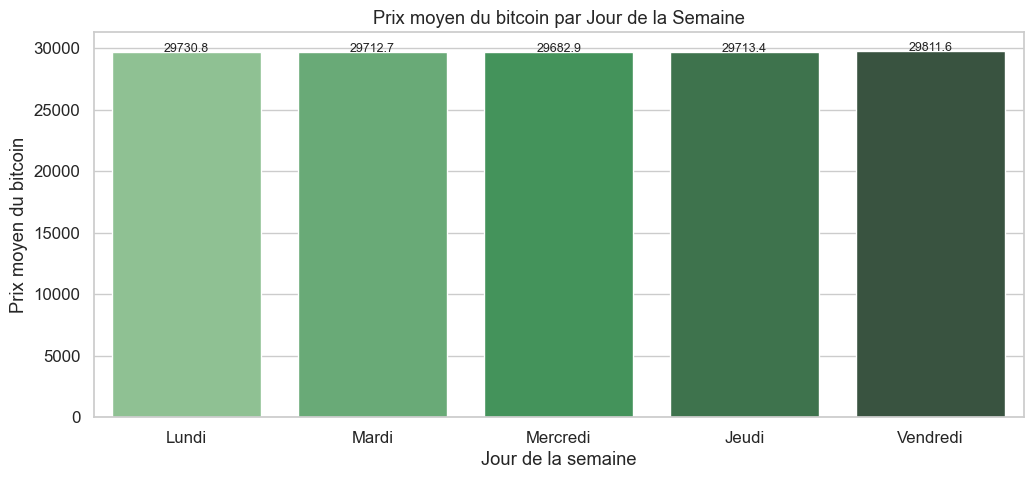

In [17]:



sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12,5)

variation_year = df.groupby("year")["bitcoin"].mean().reset_index()

sns.barplot(x="year", y="bitcoin", data=variation_year, palette="Blues_d")
plt.title("Prix moyen du bitcoin par Année")
plt.xlabel("Année")
plt.ylabel("Prix moyen du bitcoin")
for index, row in variation_year.iterrows():
    plt.text(index, row.bitcoin + 5, f"{row.bitcoin:.1f}", ha='center', fontsize=9)
plt.show()

variation_month = df.groupby("month")["bitcoin"].mean().reset_index()
variation_month = variation_month.sort_values("month")

sns.lineplot(x="month", y="bitcoin", data=variation_month, marker="o")
plt.title("Prix moyen du bitcoin par Mois")
plt.xlabel("Mois")
plt.ylabel("Prix moyen du bitcoin")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

# -----------------------------

# -----------------------------
variation_day = df.groupby("day_of_week")["bitcoin"].mean().reset_index()

days_map = {0:"Lundi",1:"Mardi",2:"Mercredi",3:"Jeudi",4:"Vendredi",5:"Samedi",6:"Dimanche"}
variation_day["day_name"] = variation_day["day_of_week"].map(days_map)

sns.barplot(x="day_name", y="bitcoin", data=variation_day, palette="Greens_d")
plt.title("Prix moyen du bitcoin par Jour de la Semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Prix moyen du bitcoin")
for index, row in variation_day.iterrows():
    plt.text(index, row.bitcoin + 5, f"{row.bitcoin:.1f}", ha='center', fontsize=9)
plt.show()

**GRAPHE 1**:
Le prix moyen du bitcoin a beaucoup monté et beaucoup baissé sur les dix dernières années. En 2017 et 2021, il a atteint des sommets, grâce à un engouement général et à l’arrivée de gros investisseurs. Mais après chaque pic, il a connu des baisses importantes, comme en 2018 et 2022. Depuis 2023, il repart à la hausse, encouragé par de nouveaux produits financiers comme les ETF. En résumé, le bitcoin reste très fluctuant, mais sa tendance générale est à la hausse sur le long terme.

**GRAPHE 2**:
Le prix du Bitcoin a commencé l’année autour de 26 700 $, puis a connu une hausse soutenue jusqu’à atteindre un pic d’environ 33 000 $ en juillet. Par la suite, il a progressivement diminué, pour revenir en novembre et décembre à des niveaux proches de ceux du début d’année, autour de 27 000 $.
Cette évolution traduit une année globalement stable, sans tendance nette à la hausse ou à la baisse, marquée par une montée estivale suivie d’une correction en fin d’année.

**GRAPHE 3** : 
Les données suggèrent que le marché du Bitcoin est relativement stable à l’échelle hebdomadaire, et qu’il n’existe pas de jour spécifique où le prix est systématiquement plus haut ou plus bas.

In [18]:

# Assurer que la colonne 'date' est bien au format datetime
df['date'] = pd.to_datetime(df['date'])

# Trier par date
df = df.sort_values('date')

# Ajouter une colonne pour la variation journalière (différence entre jours consécutifs)
df['bitcoin_diff'] = df['bitcoin'].diff()  # variation absolue
df['bitcoin_pct_change'] = df['bitcoin'].pct_change() * 100  # variation en pourcentage

# Valeurs globales
bitcoin_max = df['bitcoin'].max()
bitcoin_min = df['bitcoin'].min()
bitcoin_range = bitcoin_max - bitcoin_min

print(f"Bitcoin maximum : {bitcoin_max}")
print(f"Bitcoin minimum : {bitcoin_min}")
print(f"Variation totale : {bitcoin_range}")

# Optionnel : afficher la variation journalière
print(df[['date', 'bitcoin', 'bitcoin_diff', 'bitcoin_pct_change']].head(10))

Bitcoin maximum : 106157.2
Bitcoin minimum : 3228.7
Variation totale : 102928.5
        date  bitcoin  bitcoin_diff  bitcoin_pct_change
0 2015-01-02   8726.2           NaN                 NaN
1 2015-01-05   8916.8         190.6            2.184227
2 2015-01-06   8547.4        -369.4           -4.142742
3 2015-01-07   8473.2         -74.2           -0.868100
4 2015-01-08   8143.5        -329.7           -3.891092
5 2015-01-09   7801.7        -341.8           -4.197213
6 2015-01-12   7954.9         153.2            1.963675
7 2015-01-13   7129.2        -825.7          -10.379766
8 2015-01-14   6853.7        -275.5           -3.864389
9 2015-01-15   6938.2          84.5            1.232911


In [19]:
df.columns

Index(['date', 'crude oil ( WTI)', 'Heating Oil', 'Conventional Gasoline',
       'RBOB', 'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel',
       'Propane', 'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'bitcoin',
       'USD FUTURE INDEX', 'gold', 'Silver', 'copper', 'year', 'month',
       'day_of_week', 'bitcoin_diff', 'bitcoin_pct_change'],
      dtype='object')

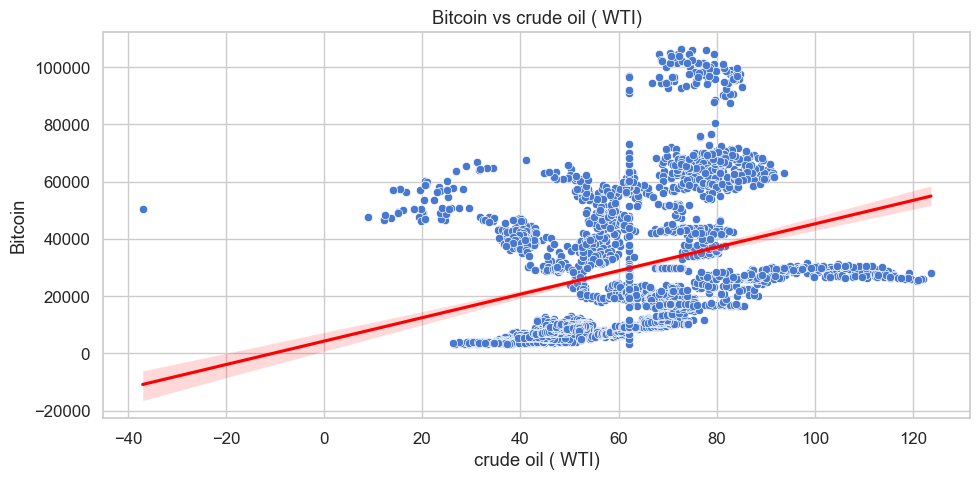

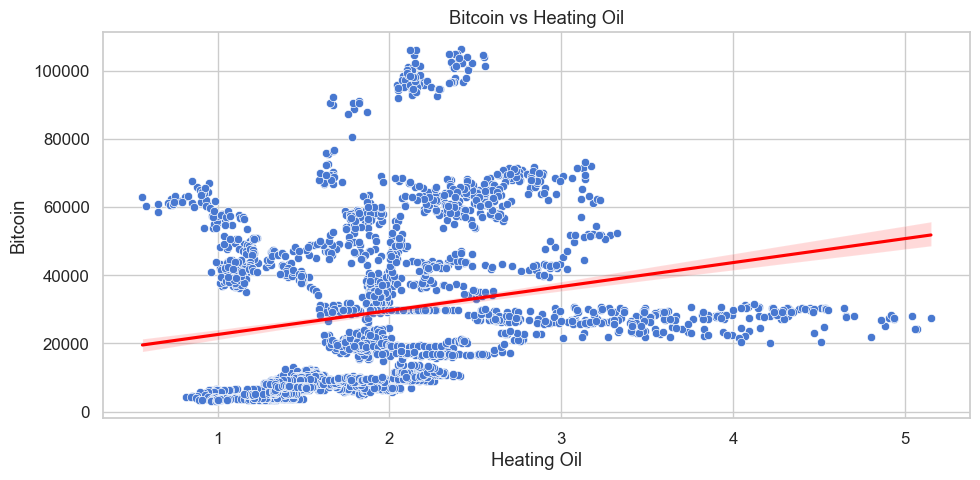

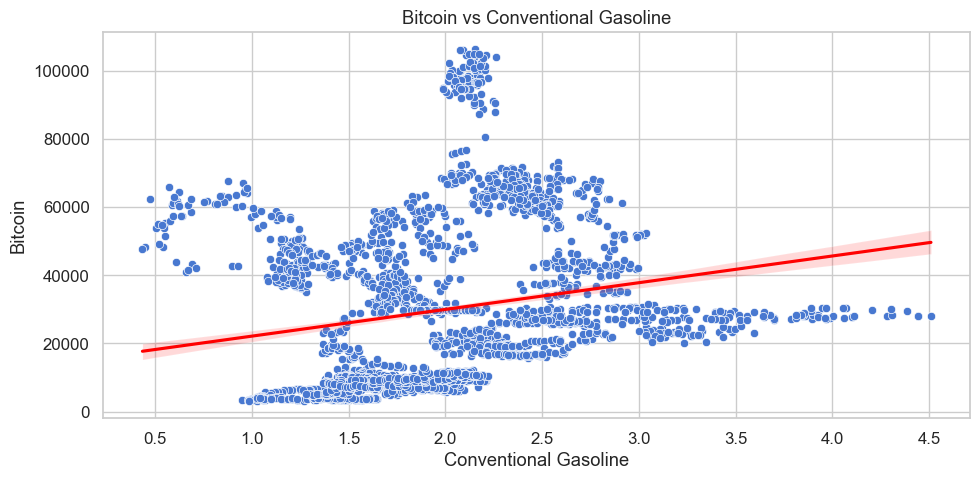

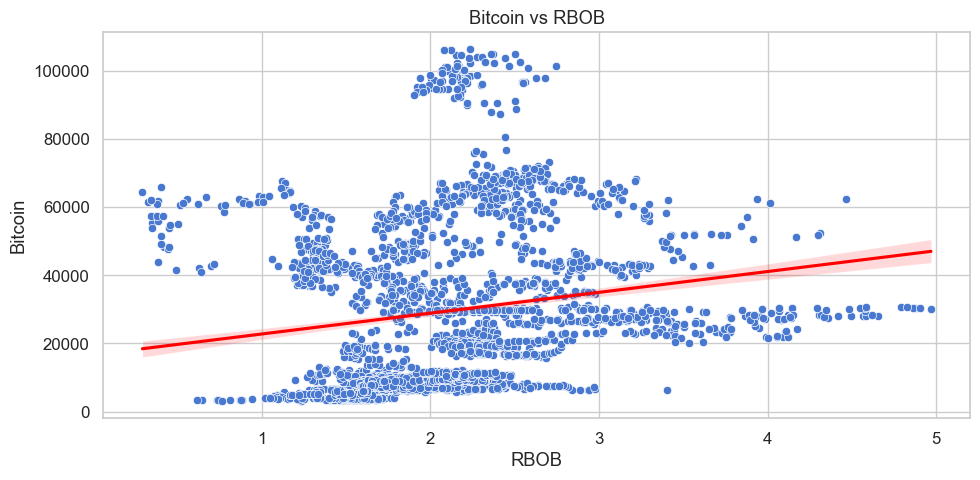

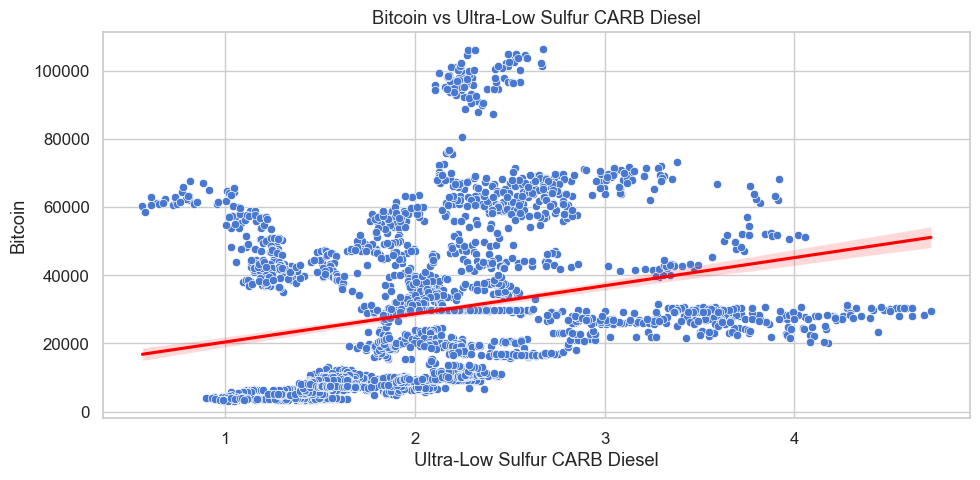

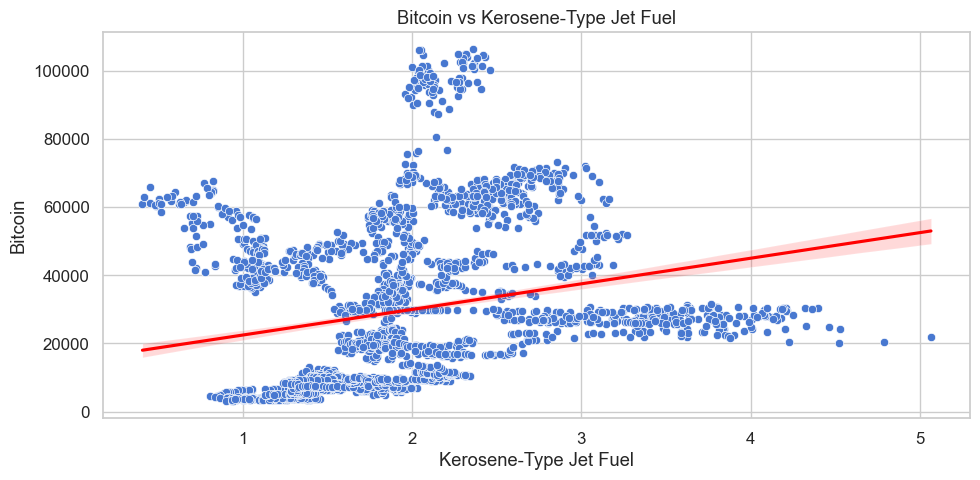

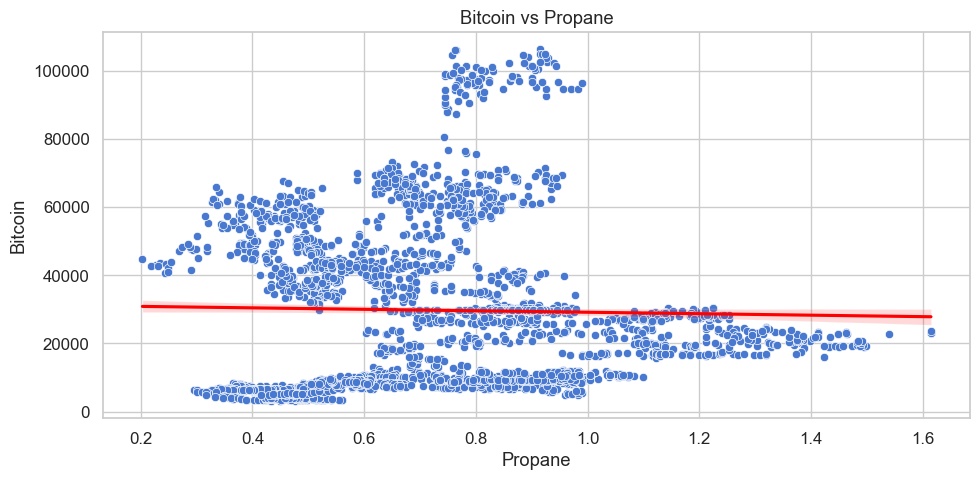

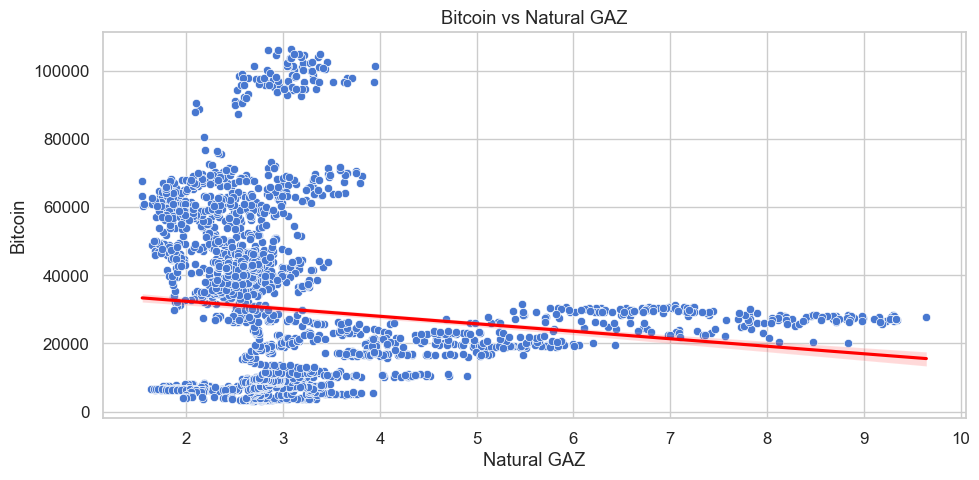

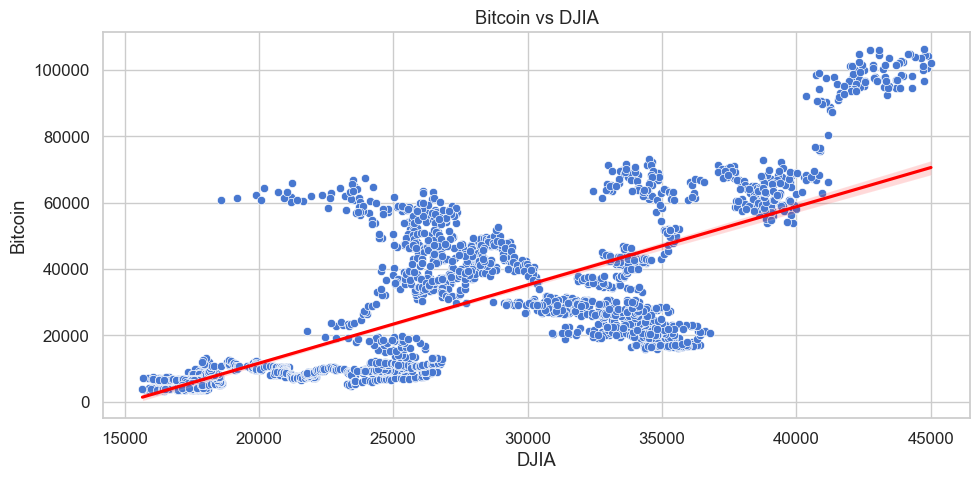

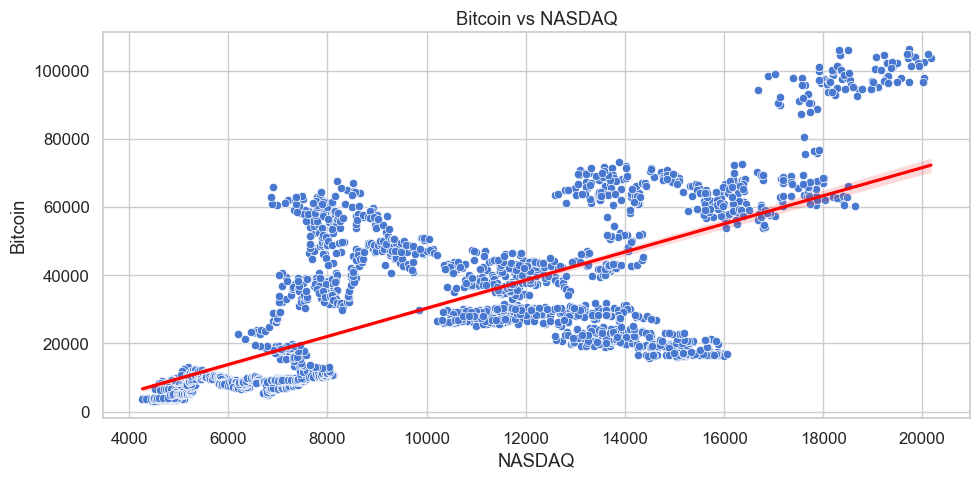

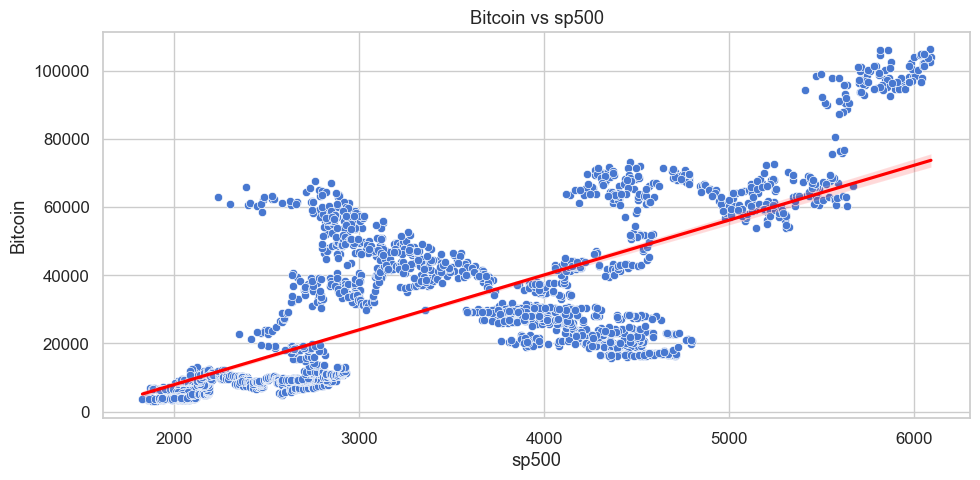

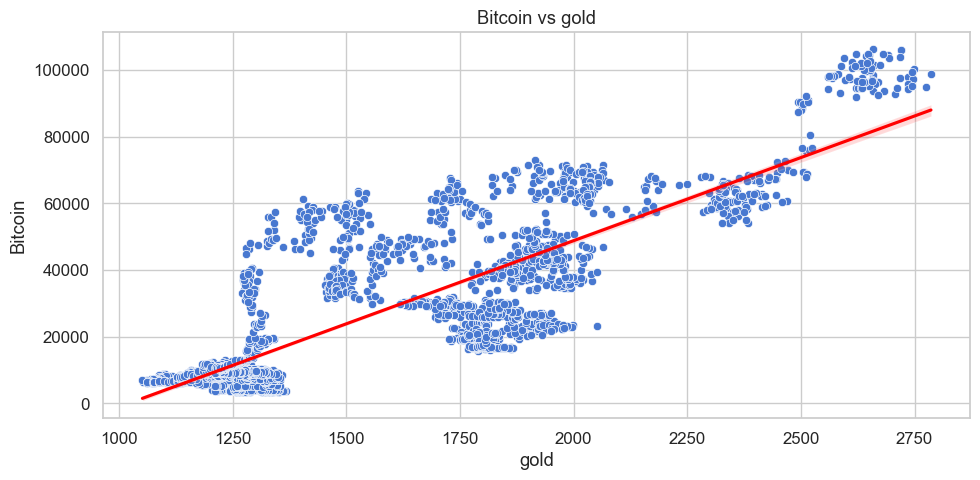

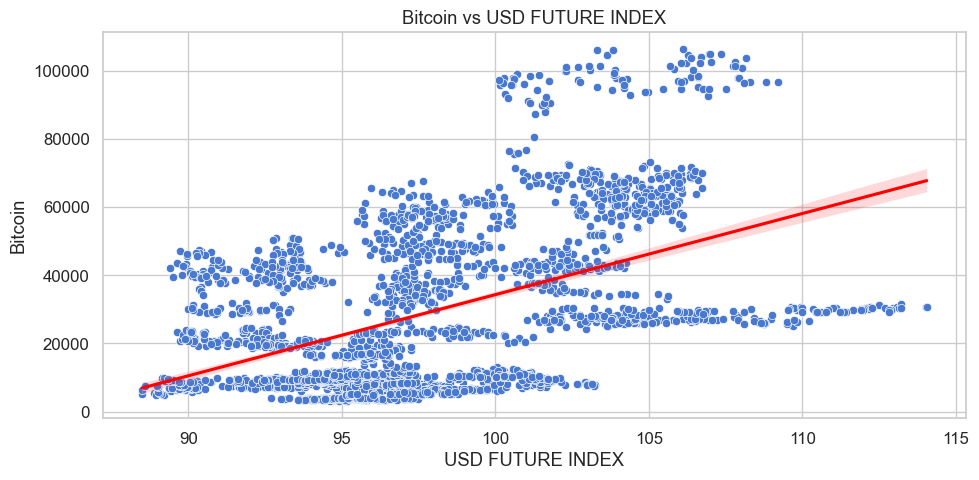

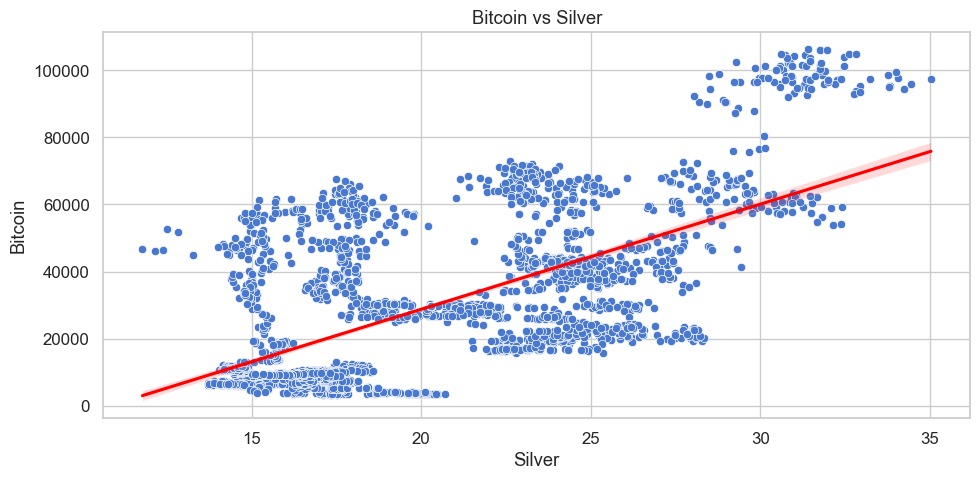

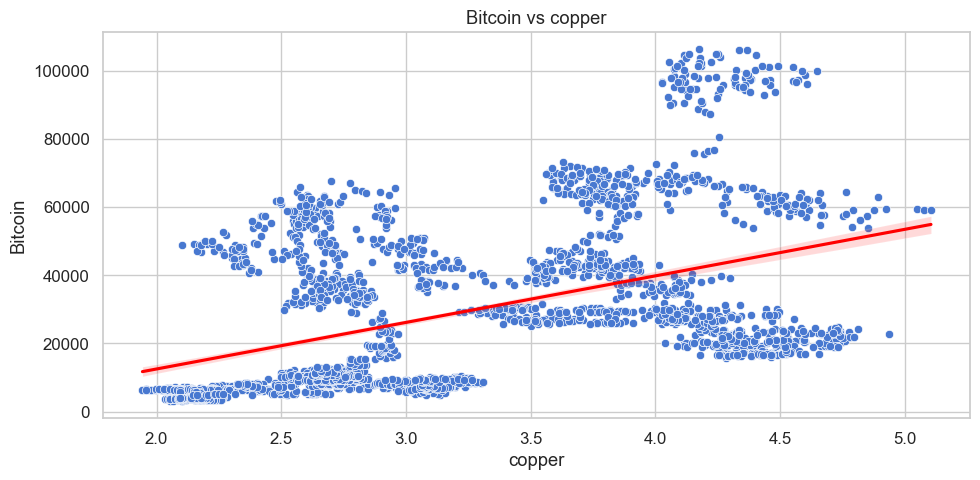

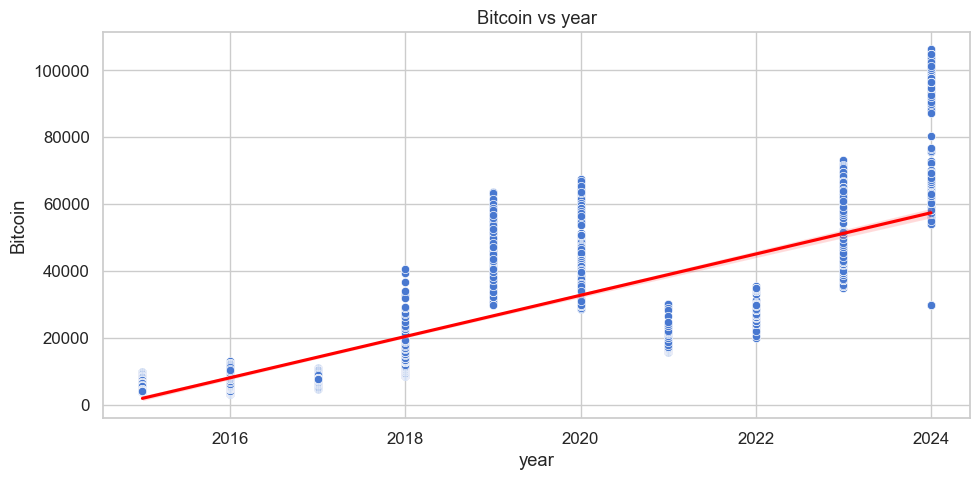

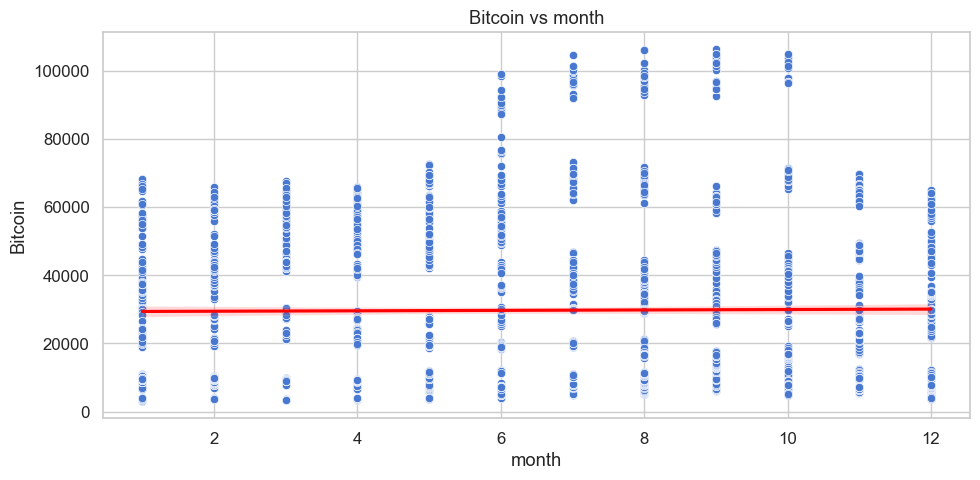

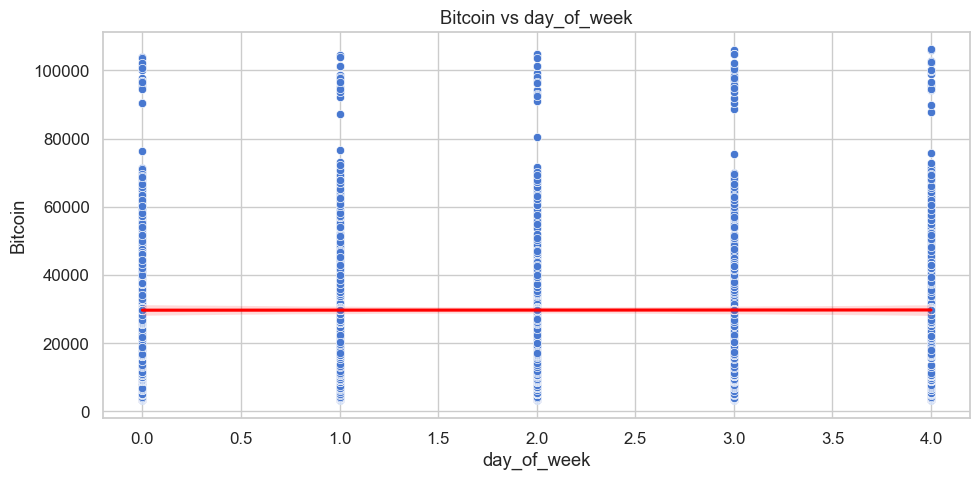

In [20]:
# Configuration générale
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,4)

# Liste des features (sauf bitcoin)
features = [
    'crude oil ( WTI)', 'Heating Oil', 'Conventional Gasoline', 'RBOB',
    'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel', 'Propane',
    'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'gold',
    'USD FUTURE INDEX', 'Silver', 'copper', 'year', 'month',
    'day_of_week'
]

# Tracer Bitcoin vs chaque feature
for col in features:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[col], y=df['bitcoin'])
    sns.regplot(x=df[col], y=df['bitcoin'], scatter=False, color='red')  # Trend line
    
    plt.title(f"Bitcoin vs {col}")
    plt.xlabel(col)
    plt.ylabel("Bitcoin")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**Corrélation forte et positive**

Paires concernées :

Bitcoin vs DJIA

Bitcoin vs NASDAQ

Bitcoin vs S&P500

Bitcoin vs Gold

Bitcoin vs Silver

Interprétation :
Les graphiques présentent une relation presque linéaire :
lorsque les principaux indices boursiers montent, le Bitcoin augmente lui aussi.
Cela montre que le Bitcoin se comporte comme un actif financier risqué, sensible au sentiment général du marché.
La corrélation positive avec les métaux précieux souligne également que le BTC est perçu comme une réserve de valeur alternative.

Conclusion :
Les marchés actions et les métaux précieux représentent des indicateurs influents pour le prix du Bitcoin.

**Corrélation faible à moyenne**

Paires concernées :

Bitcoin vs WTI Crude Oil

Bitcoin vs Heating Oil

Bitcoin vs Ultra-Low Sulfur Diesel

Bitcoin vs Kerosene Jet Fuel

Bitcoin vs Conventional Gasoline

Bitcoin vs RBOB Gasoline

Interprétation :
Malgré une légère pente positive, les points sont très dispersés.
Cela signifie que même si une hausse du prix de l’énergie peut accompagner une hausse du Bitcoin, la relation reste faible et non structurée.

Conclusion :
Le Bitcoin n’est pas directement influencé par les marchés pétroliers.

**Corrélation faible mais négative**

Paires concernées :

Bitcoin vs Propane

Bitcoin vs Natural Gas

Interprétation :
On observe une très légère relation inverse :
quand les prix du gaz naturel ou du propane augmentent, le Bitcoin a tendance à légèrement baisser.
Cependant, le nuage de points est très diffus → relation non significative.

Conclusion :
Les marchés du gaz ne déterminent pas l’évolution du Bitcoin.

**Corrélations très faibles : Gaz et Dollar**

Variables :

Natural Gas

Propane

USD Future Index

Le gaz naturel et le propane montrent une relation quasi inexistante avec le Bitcoin.
Le USD Future Index affiche une légère corrélation positive dans cet échantillon, bien que la relation historique soit souvent inverse.


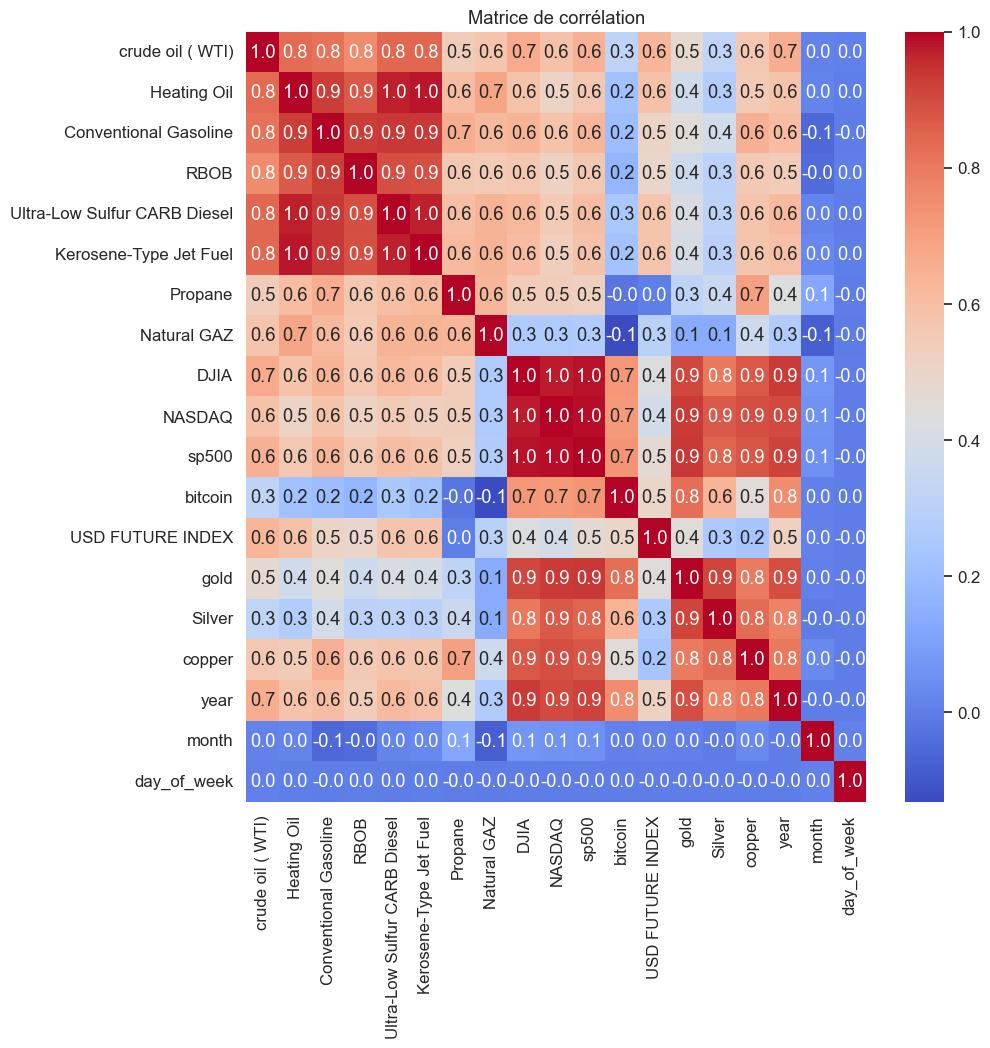

In [21]:
cols_to_clean = [
    'crude oil ( WTI)', 'Heating Oil', 'Conventional Gasoline', 'RBOB',
    'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel', 'Propane',
    'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'bitcoin',
    'USD FUTURE INDEX', 'gold', 'Silver', 'copper','year', 'month',
       'day_of_week'
]

# Nettoyer les colonnes numériques (supprimer les virgules et convertir en float)
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False).astype(float)

# Calculer la matrice de corrélation
corr_matrix = df[cols_to_clean].corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation")
plt.show()

La matrice de corrélation montre que le Bitcoin présente un comportement hybride : il est fortement lié à l’or et à certaines tendances longues (valeur refuge partielle), modérément corrélé aux métaux comme l’argent et le cuivre ainsi qu’au dollar, et suit également les indices boursiers majeurs, reflétant son profil d’actif risqué. En revanche, il est peu influencé par d’autres variables économiques. Ainsi, le Bitcoin n’est ni un actif purement spéculatif ni un refuge total, mais dépend à la fois du climat financier global et des cycles économiques.

## 5️⃣ Sélection des features


In [22]:
# S'assurer que la date est bien datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)


In [23]:
# Bitcoin × NASDAQ
df['btc_nasdaq'] = df['bitcoin'] * df['NASDAQ']

# Bitcoin × DJIA
df['btc_djia'] = df['bitcoin'] * df['DJIA']

# Bitcoin – Gold
df['btc_gold_spread'] = df['bitcoin'] - df['gold']

# Gold / USD
df['gold_usd_ratio'] = df['gold'] / df['USD FUTURE INDEX']

# Bitcoin × Oil
df['btc_oil'] = df['bitcoin'] * df['crude oil ( WTI)']


In [24]:
# Année, mois, jour de la semaine déjà présents
# On peut créer aussi des sinus/cosinus pour capturer la saisonnalité hebdomadaire ou annuelle

df['day_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)


In [25]:
# Supprimer les lignes contenant NaN générées par les lags et rolling
df = df.dropna().reset_index(drop=True)


In [26]:
df.columns

Index(['date', 'crude oil ( WTI)', 'Heating Oil', 'Conventional Gasoline',
       'RBOB', 'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel',
       'Propane', 'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'bitcoin',
       'USD FUTURE INDEX', 'gold', 'Silver', 'copper', 'year', 'month',
       'day_of_week', 'bitcoin_diff', 'bitcoin_pct_change', 'btc_nasdaq',
       'btc_djia', 'btc_gold_spread', 'gold_usd_ratio', 'btc_oil', 'day_sin',
       'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

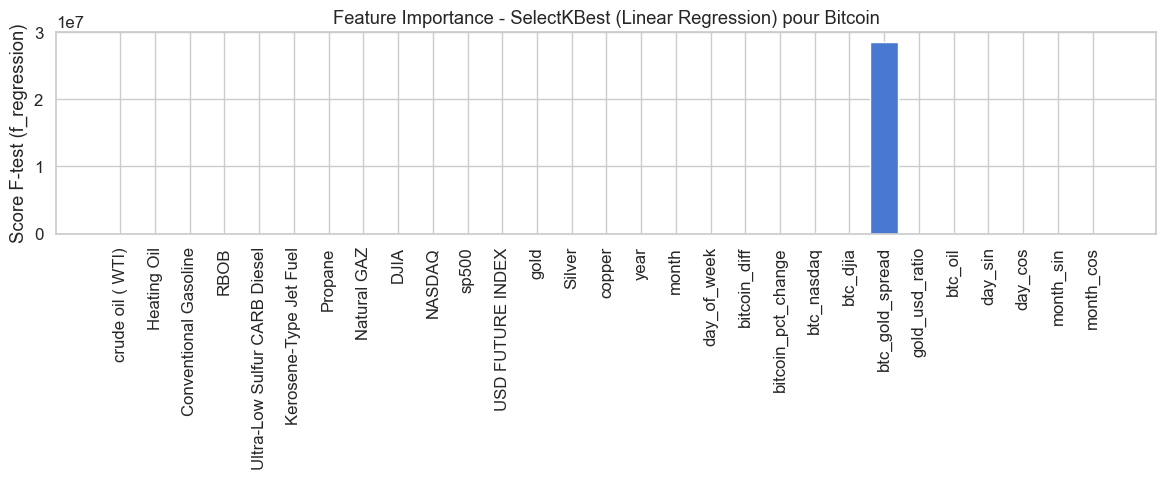

Features sélectionnées (Linear Regression) : ['crude oil ( WTI)', 'Heating Oil', 'Conventional Gasoline', 'RBOB', 'Ultra-Low Sulfur CARB Diesel', 'Kerosene-Type Jet Fuel', 'Propane', 'Natural GAZ', 'DJIA', 'NASDAQ', 'sp500', 'USD FUTURE INDEX', 'gold', 'Silver', 'copper', 'year', 'month', 'day_of_week', 'bitcoin_diff', 'bitcoin_pct_change', 'btc_nasdaq', 'btc_djia', 'btc_gold_spread', 'gold_usd_ratio', 'btc_oil', 'day_sin', 'day_cos', 'month_sin', 'month_cos']


In [27]:
# ======================================================
# 1) Dataset sans la colonne cible
# ======================================================
X = df.drop(columns=["bitcoin", "date"], errors="ignore")
y = df["bitcoin"]

# ======================================================
# 2) Feature Selection
# ======================================================
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)

scores = selector.scores_
features = X.columns

# ======================================================
# 3) Plot des scores
# ======================================================
plt.figure(figsize=(12,5))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.title("Feature Importance - SelectKBest (Linear Regression) pour Bitcoin")
plt.ylabel("Score F-test (f_regression)")
plt.tight_layout()
plt.show()

selected_features_lr = X.columns[selector.get_support()]
print("Features sélectionnées (Linear Regression) :", list(selected_features_lr))


In [28]:
# Dataset
X = df.drop(columns=["bitcoin", "date"], errors="ignore")
y = df["bitcoin"]

# Sélection Top 7 features
selector = SelectKBest(score_func=f_regression, k=7)
selector.fit(X, y)

# Récupération des noms des features sélectionnées
selected_features_lr = X.columns[selector.get_support()]

print("Top 7 Features sélectionnées (Linear Regression) :")
print(list(selected_features_lr))


Top 7 Features sélectionnées (Linear Regression) :
['gold', 'year', 'btc_nasdaq', 'btc_djia', 'btc_gold_spread', 'gold_usd_ratio', 'btc_oil']


                         feature    importance
22               btc_gold_spread  9.114290e-01
21                      btc_djia  4.441498e-02
20                    btc_nasdaq  4.228535e-02
8                           DJIA  1.142910e-03
24                       btc_oil  4.939702e-04
1                    Heating Oil  4.940071e-05
4   Ultra-Low Sulfur CARB Diesel  3.536328e-05
7                    Natural GAZ  3.370840e-05
12                          gold  3.288689e-05
23                gold_usd_ratio  1.401752e-05
11              USD FUTURE INDEX  1.184301e-05
2          Conventional Gasoline  1.086071e-05
3                           RBOB  6.498895e-06
14                        copper  5.882947e-06
13                        Silver  5.508086e-06
0               crude oil ( WTI)  3.669665e-06
6                        Propane  3.276721e-06
18                  bitcoin_diff  2.940063e-06
19            bitcoin_pct_change  2.796154e-06
5         Kerosene-Type Jet Fuel  2.489627e-06
9            

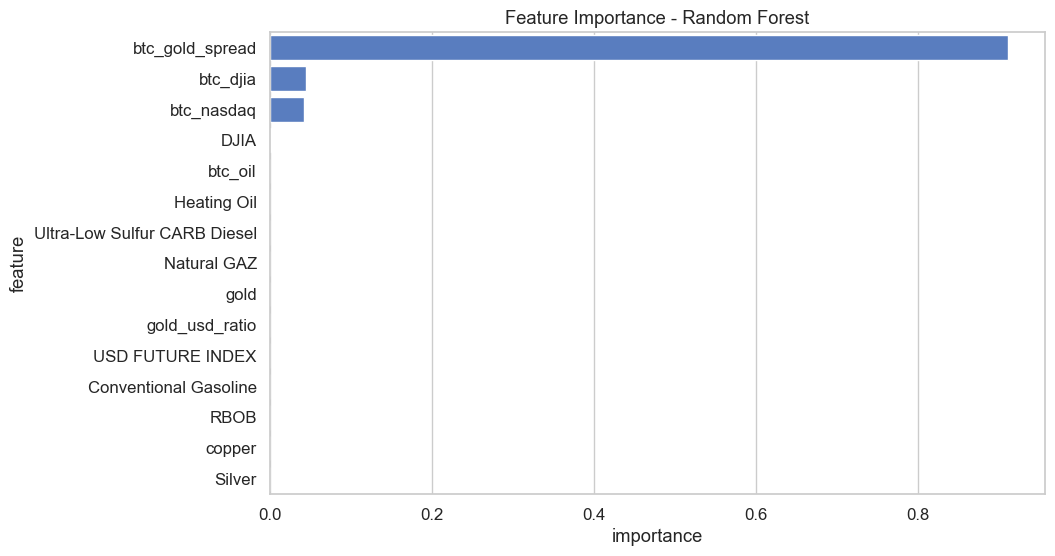

Features sélectionnées (Random Forest) : ['btc_gold_spread', 'btc_djia', 'btc_nasdaq', 'DJIA', 'btc_oil', 'Heating Oil', 'Ultra-Low Sulfur CARB Diesel', 'Natural GAZ', 'gold', 'gold_usd_ratio', 'USD FUTURE INDEX', 'Conventional Gasoline']


In [29]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print(importances)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=importances.head(15))
plt.title("Feature Importance - Random Forest")
plt.show()

selected_features_rf = importances.head(12)["feature"].tolist()
print("Features sélectionnées (Random Forest) :", selected_features_rf)


                         feature    importance
22               btc_gold_spread  7.823033e-01
20                    btc_nasdaq  1.162169e-01
21                      btc_djia  9.743241e-02
24                       btc_oil  2.355491e-03
23                gold_usd_ratio  1.276155e-03
14                        copper  1.263184e-04
12                          gold  8.507607e-05
8                           DJIA  3.420383e-05
11              USD FUTURE INDEX  3.088876e-05
7                    Natural GAZ  2.985884e-05
6                        Propane  1.252643e-05
13                        Silver  1.237720e-05
10                         sp500  1.114605e-05
27                     month_sin  7.626664e-06
16                         month  7.422569e-06
17                   day_of_week  5.916052e-06
28                     month_cos  5.874158e-06
3                           RBOB  5.676198e-06
5         Kerosene-Type Jet Fuel  5.576270e-06
18                  bitcoin_diff  5.466492e-06
1            

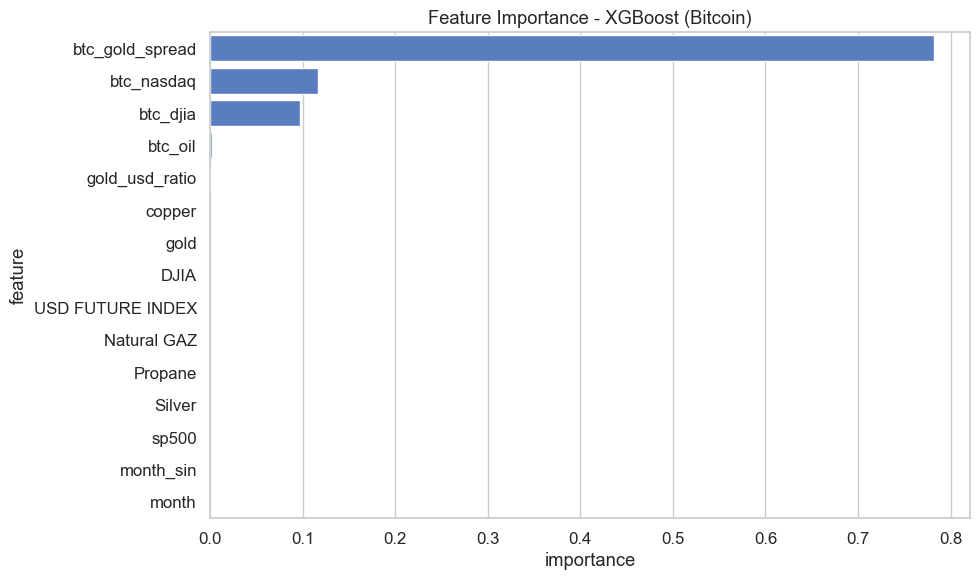

Features sélectionnées (XGBoost) : ['btc_gold_spread', 'btc_nasdaq', 'btc_djia', 'btc_oil', 'gold_usd_ratio', 'copper', 'gold', 'DJIA', 'USD FUTURE INDEX', 'Natural GAZ', 'Propane', 'Silver']


In [30]:
# XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05
)

# Dataset
X = df.drop(columns=["bitcoin", "date"], errors="ignore")
y = df["bitcoin"]

# Entraînement du modèle
model_xgb.fit(X, y)

# Importance des features
xgb_import = pd.DataFrame({
    "feature": X.columns,
    "importance": model_xgb.feature_importances_
}).sort_values("importance", ascending=False)

print(xgb_import)

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=xgb_import.head(15))
plt.title("Feature Importance - XGBoost (Bitcoin)")
plt.tight_layout()
plt.show()

# Sélection des top 12 features
selected_features_xgb = xgb_import.head(12)["feature"].tolist()
print("Features sélectionnées (XGBoost) :", selected_features_xgb)


## ENTRAINNEMENT DES MODELS 

## Data split

### Fonctions d'evaluation 

In [31]:

def evaluate(true, pred, name):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    print(f"--- {name} ---")
    print("RMSE:", rmse)
    print("MAE :", mae)
    print()


In [32]:



def regression_accuracy(y_true, y_pred):
    # MAPE
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # en pourcentage
    
    # Accuracy
    accuracy = 100 - mape
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # R²
    r2 = r2_score(y_true, y_pred)
    
    return mape, accuracy, rmse, r2


In [33]:
def plot_prediction(y_test, y_pred, model_name="Model"):
    plt.figure(figsize=(14,5))
    plt.plot(y_test.index, y_test, label='Réel', color='blue')
    plt.plot(y_test.index, y_pred, label='Prédit', color='red')
    plt.title(f"{model_name} : Bitcoin Réel vs Prédit")
    plt.xlabel("Index")
    plt.ylabel("Prix Bitcoin")
    plt.legend()
    plt.show()


In [34]:
print(df.dtypes)

date                            datetime64[ns]
crude oil ( WTI)                       float64
Heating Oil                            float64
Conventional Gasoline                  float64
RBOB                                   float64
Ultra-Low Sulfur CARB Diesel           float64
Kerosene-Type Jet Fuel                 float64
Propane                                float64
Natural GAZ                            float64
DJIA                                   float64
NASDAQ                                 float64
sp500                                  float64
bitcoin                                float64
USD FUTURE INDEX                       float64
gold                                   float64
Silver                                 float64
copper                                 float64
year                                   float64
month                                  float64
day_of_week                            float64
bitcoin_diff                           float64
bitcoin_pct_c

In [35]:
def regression_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    acc = 100 - mape
    return mape, acc, rmse, r2

In [36]:
df.drop(columns='date', inplace=True)
df.head()

,crude oil ( WTI),Heating Oil,Conventional Gasoline,RBOB,Ultra-Low Sulfur CARB Diesel,Kerosene-Type Jet Fuel,Propane,Natural GAZ,DJIA,NASDAQ,...,bitcoin_pct_change,btc_nasdaq,btc_djia,btc_gold_spread,gold_usd_ratio,btc_oil,day_sin,day_cos,month_sin,month_cos
0,50.05,1.646,1.462,1.667,1.518,1.647,0.547,2.894,17371.64,4652.57,...,2.184227,4.148604e+07,1.548994e+08,7728.65,11.909129,446285.840,0.000000,1.000000,0.5,0.866025
1,47.98,1.709,1.540,1.750,1.516,1.709,0.574,2.855,17584.52,4592.74,...,-4.142742,3.925599e+07,1.503019e+08,7363.20,11.968870,410104.252,0.781831,0.623490,0.5,0.866025
2,48.69,1.774,1.575,1.663,1.599,1.653,0.594,2.777,17907.87,4650.47,...,-0.868100,3.940436e+07,1.517370e+08,7279.70,12.113677,412560.108,0.974928,-0.222521,0.5,0.866025
3,48.80,1.718,1.483,1.659,1.674,1.675,0.604,2.816,17737.37,4736.19,...,-3.891092,3.856916e+07,1.444443e+08,6927.77,12.454463,397402.800,0.433884,-0.900969,0.5,0.866025
4,48.35,1.747,1.516,1.717,1.784,1.714,0.599,2.733,17640.84,4704.07,...,-4.197213,3.669974e+07,1.376285e+08,6580.18,12.501868,377212.195,-0.433884,-0.900969,0.5,0.866025


### 6️⃣ Entrainnement des models

### Random Forest Regression

In [37]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12,5)

Taille des datasets :
Train: 1540, Validation: 514, Test: 514

=== Performances corrigées ===
Train -> MAPE: 0.14 %, RMSE: 43.42, R²: 1.0000
Validation -> MAPE: 13.26 %, RMSE: 3399.38, R²: 0.4631
Test -> MAPE: 6.40 %, RMSE: 13071.54, R²: 0.6059


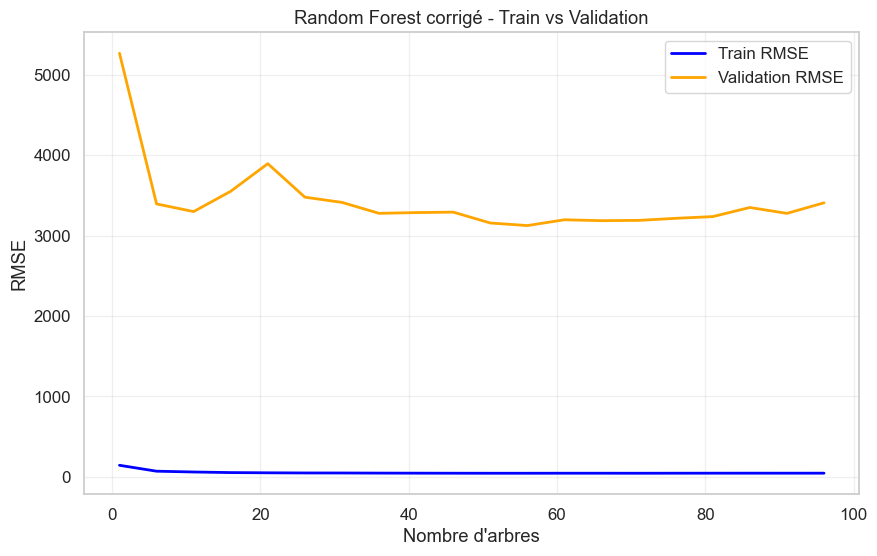

In [38]:

X = df[['btc_gold_spread', 'btc_djia', 'btc_nasdaq']]
y = df['bitcoin']


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False) # 0.25*0.8=0.2

print("Taille des datasets :")
print(f"Train: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")


rf = RandomForestRegressor(
    n_estimators=200,       # moins d'arbres pour réduire variance
    max_depth=15,
    min_samples_leaf=1, 
     min_samples_split=2,
     
    random_state=0
)
rf.fit(X_train, y_train)


y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)


mape_train, acc_train, rmse_train, r2_train = regression_accuracy(y_train, y_train_pred)
mape_val, acc_val, rmse_val, r2_val = regression_accuracy(y_val, y_val_pred)
mape_test, acc_test, rmse_test, r2_test = regression_accuracy(y_test, y_test_pred)

print("\n=== Performances corrigées ===")
print(f"Train -> MAPE: {mape_train:.2f} %, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Validation -> MAPE: {mape_val:.2f} %, RMSE: {rmse_val:.2f}, R²: {r2_val:.4f}")
print(f"Test -> MAPE: {mape_test:.2f} %, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")


train_loss = []
val_loss = []
n_trees = range(1, 100, 5)

for n in n_trees:
    rf_temp = RandomForestRegressor(
        n_estimators=n,

        random_state=0
    )
    rf_temp.fit(X_train, y_train)
    train_loss.append(np.sqrt(mean_squared_error(y_train, rf_temp.predict(X_train))))
    val_loss.append(np.sqrt(mean_squared_error(y_val, rf_temp.predict(X_val))))

plt.figure(figsize=(10,6))
plt.plot(n_trees, train_loss, label='Train RMSE', color='blue', linewidth=2)
plt.plot(n_trees, val_loss, label='Validation RMSE', color='orange', linewidth=2)
plt.xlabel("Nombre d'arbres")
plt.ylabel("RMSE")
plt.title("Random Forest corrigé - Train vs Validation")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


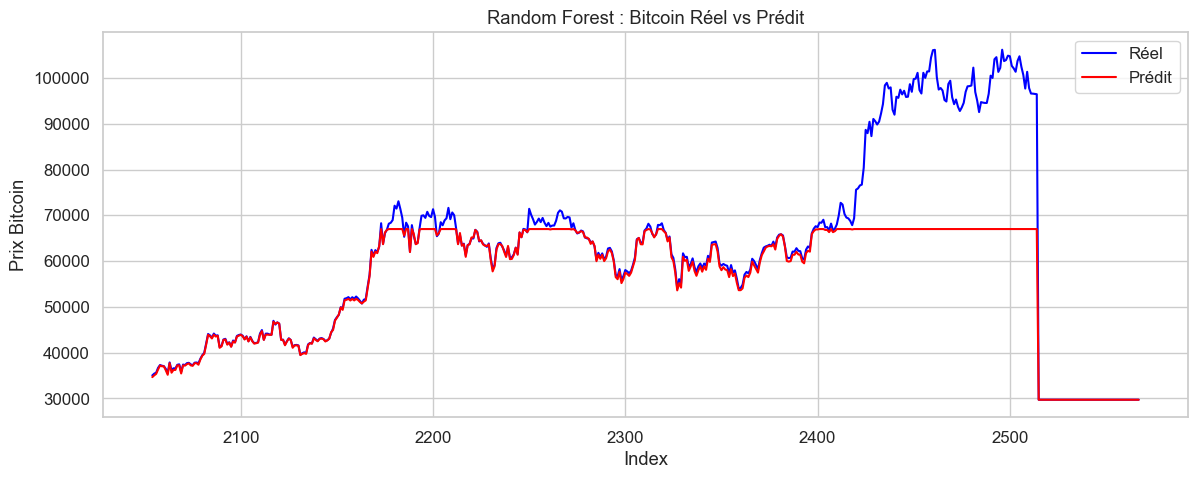

In [39]:
plot_prediction(y_test, y_test_pred, "Random Forest")

### SVR


--- Performances ---
Train -> MAPE: 0.74 %, RMSE: 84.48, R²: 1.0000
Validation -> MAPE: 0.92 %, RMSE: 237.57, R²: 0.9974
Test -> MAPE: 0.78 %, RMSE: 732.40, R²: 0.9988


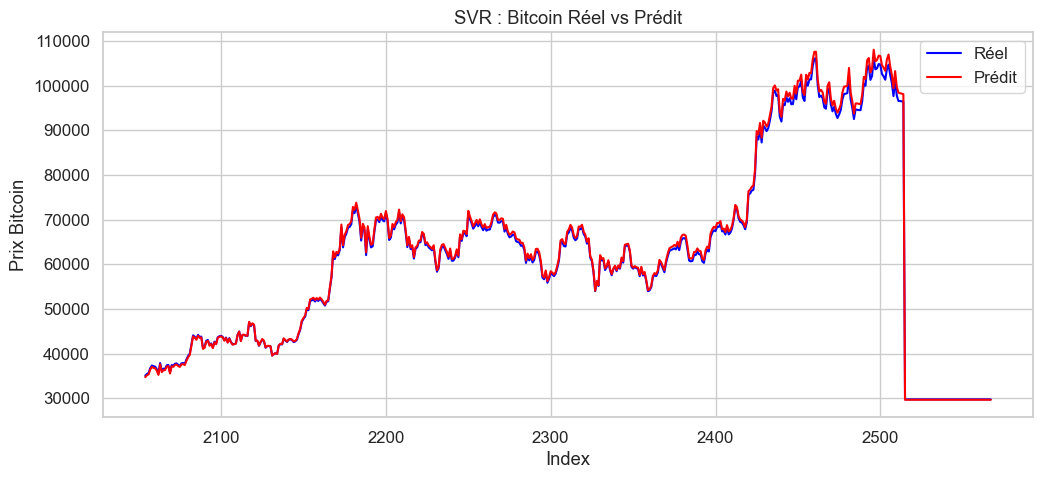

In [40]:

X = df[['btc_gold_spread', 'btc_djia', 'btc_nasdaq']]
y = df['bitcoin']


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False) # 0.25*0.8=0.2


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()


svr_model = SVR(
    kernel='linear',
    C=100,          # réduire C pour moins d'overfitting
    epsilon=0.01,
      gamma= 0.01  # augmenter epsilon pour moins de sensibilité au bruit
)

# Entraînement
svr_model.fit(X_train_scaled, y_train_scaled)

y_train_pred_scaled = svr_model.predict(X_train_scaled)
y_val_pred_scaled = svr_model.predict(X_val_scaled)
y_test_pred_scaled = svr_model.predict(X_test_scaled)

y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()


mape_train, acc_train, rmse_train, r2_train = regression_accuracy(y_train, y_train_pred)
mape_val, acc_val, rmse_val, r2_val = regression_accuracy(y_val, y_val_pred)
mape_test, acc_test, rmse_test, r2_test = regression_accuracy(y_test, y_test_pred)

print("\n--- Performances ---")
print(f"Train -> MAPE: {mape_train:.2f} %, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Validation -> MAPE: {mape_val:.2f} %, RMSE: {rmse_val:.2f}, R²: {r2_val:.4f}")
print(f"Test -> MAPE: {mape_test:.2f} %, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")


plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Réel', color='blue')
plt.plot(y_test.index, y_test_pred, label='Prédit', color='red')
plt.title("SVR : Bitcoin Réel vs Prédit")
plt.xlabel("Index")
plt.ylabel("Prix Bitcoin")
plt.legend()
plt.show()


Le modèle SVR est bien entraîné, car on observe que les valeurs de R² pour l’entraînement, la validation et le test sont très proches, pratiquement égales, avec un taux d’erreur inférieur à 0,92 %.

## OPTIMISATION AVEC GRIDSEARCH

### OPTIMISATION POUR RANDOMFOREST 

In [41]:


param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error', 
    cv=3, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Meilleurs paramètres RF :", grid_search.best_params_)


Meilleurs paramètres RF : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### OPTIMISATION POUR SVR

In [42]:


param_grid = {
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'poly', 'linear']
}

svr = SVR()

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',  # minimiser MAPE
    cv=3,
    n_jobs=-1
)

# Entraînement
grid_search.fit(X_train_scaled, y_train_scaled)

# Meilleur modèle
best_svr = grid_search.best_estimator_
print("Meilleurs paramètres SVR :", grid_search.best_params_)


Meilleurs paramètres SVR : {'C': 50, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
